# Machine Learning for Deprived Area Mapping (ML4DAM)

## Using Contextual features extracted from Sentinel 2

In [1]:
# imprt libraries 
import os 
from glob import glob
import numpy as np
import pandas as pd
from osgeo import gdal
import rasterio 
from rasterio.plot import show
from rasterio.merge import merge
import matplotlib.pyplot as plt

from utils import utils
from utils import util_preprocess


Set Working directorate 

In [2]:
# Get abosolute path of the current folder
abspath_curr = 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/'

# Target
target = 'class'

# Random seed
random_seed = 42

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

## Fetch and load contextual features 

In [8]:
# load contextual ffeature 

RasterTiles = sorted(glob('C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea/*.tif'))
MaskTiles = sorted(glob('C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask/*.tif'))

In [113]:
Tiles = []
for item in zip(RasterTiles, MaskTiles):
    # print(item)
    Tiles.append(item)


len(Tiles)

import random
random.seed(42)
random.shuffle(Tiles)

In [114]:
# import random
# random.shuffle(Tiles)

Tiles[1]

('C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea\\nai_area7.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area7.tif')

In [115]:
RasterTiles = []
MaskTiles = []
for raw_image, label in Tiles:
    RasterTiles.append(raw_image)
    MaskTiles.append(label)


In [118]:
MaskTiles

['C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area30.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area7.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area39.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area26.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area24.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area25.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area28.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area21.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area6.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area42.tif',
 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area16.tif',
 'C:/Users/mowus/Docume

In [119]:
X_train_list = RasterTiles[0:30]
X_val_list = RasterTiles[31:35]
X_test_list = RasterTiles[36:42]


y_train_list = MaskTiles[0:30]
y_val_list = MaskTiles[31:35]
y_test_list = MaskTiles[36:42]


In [131]:
print(X_train_list[1:6])
print(y_train_list[1:6])

['C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea\\nai_area7.tif', 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea\\nai_area39.tif', 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea\\nai_area26.tif', 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea\\nai_area24.tif', 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea\\nai_area25.tif']
['C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area7.tif', 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area39.tif', 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area26.tif', 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area24.tif', 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask\\nai_area25.tif']


### Process train, validationa and test data

In [120]:
# Preparing training

raster_to_mosiac = []

for p in X_train_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)


Xtrain, out_transform = merge(raster_to_mosiac)
print(Xtrain.shape)

raster_to_mosiac = []

for p in y_train_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)

ytrain, out_transform = merge(raster_to_mosiac)
print(ytrain.shape)

# Preparing validation 

raster_to_mosiac = []

for p in X_val_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)


Xval, out_transform = merge(raster_to_mosiac)
print(Xval.shape)

raster_to_mosiac = []

for p in y_val_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)

yval, out_transform = merge(raster_to_mosiac)
print(yval.shape)



# Preparing test data

raster_to_mosiac = []

for p in X_test_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)


Xtest, out_transform = merge(raster_to_mosiac)
print(Xtest.shape)

raster_to_mosiac = []

for p in y_test_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)

ytest, out_transform = merge(raster_to_mosiac)
print(ytest.shape)


(45, 1686, 2879)
(1, 1686, 2879)
(45, 1036, 479)
(1, 1036, 479)
(45, 929, 2087)
(1, 929, 2087)


In [121]:
X_train = Xtrain[:, Xtrain[0,...]!=-9999]
y_train = ytrain[:, ytrain[0,...]!=-9999]
y_train =y_train.astype(int)
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Training data set\n', frequencies)
print(X_train.shape)
print(y_train.shape)


X_train = np.transpose(X_train)
y_train = np.transpose(y_train)

# Validation

X_val = Xval[:, Xval[0,...]!=-9999]
y_val = yval[:, yval[0,...]!=-9999]
y_val = y_val.astype(int)
(unique, counts) = np.unique(y_val, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('\n Validation data set\n', frequencies)

print(X_val.shape)
print(y_val.shape)


X_val = np.transpose(X_val)
y_val = np.transpose(y_val)

# Test

X_test = Xtest[:, Xtest[0,...]!=-9999]
y_test = ytest[:, ytest[0,...]!=-9999]
y_yest = y_test.astype(int)
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('\n Test data set\n', frequencies)

print(X_test.shape)
print(y_test.shape)


X_test = np.transpose(X_test)
y_test = np.transpose(y_test)


Training data set
 [[     0 180732]
 [     1  90018]]
(45, 270750)
(1, 270750)

 Validation data set
 [[    0 19514]
 [    1 16586]]
(45, 36100)
(1, 36100)

 Test data set
 [[0.0000e+00 3.4935e+04]
 [1.0000e+00 1.9215e+04]]
(45, 54150)
(1, 54150)


### Standardize data

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# # Imputing missing values
si = SimpleImputer(missing_values=0, strategy='mean')

# impute the training data
X_train = si.fit_transform(X_train)

# impute the validation data
X_val = si.fit_transform(X_val)

# impute the test data
X_test = si.fit_transform(X_test)

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.fit_transform(X_val)

# Standardize the test data
X_test = ss.fit_transform(X_test)

### Modelling 

In [68]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

C:\Users\mowus\AppData\Local\Temp\ipykernel_5272\4036133893.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf1.fit(x, y)


RandomForestClassifier(class_weight='balanced', max_depth=2000,
                       min_samples_split=3, n_estimators=200, random_state=42)

In [77]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# pred = model_rf1.predict(X_val)
# mgl_test = accuracy_score(y_val, pred)
# print(("Test accuracy: %f") % (mgl_test))
# print("=== Confusion Matrix ===")
# print(confusion_matrix(y_val, pred))
# print('\n')
# print("=== Classification Report ===")
# print(classification_report(y_val, pred))

Test accuracy: 0.513130
=== Confusion Matrix ===
[[18524     0]
 [17576     0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     18524
           1       0.00      0.00      0.00     17576

    accuracy                           0.51     36100
   macro avg       0.26      0.50      0.34     36100
weighted avg       0.26      0.51      0.35     36100



c:\Users\mowus\.conda\envs\mongolia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mowus\.conda\envs\mongolia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mowus\.conda\envs\mongolia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost

In [132]:
# import XGBClassifier
from xgboost import XGBClassifier

params = {'n_estimators': 2000,
          'scale_pos_weight': 2,
          'early_stopping_rounds': 100,
          'eval_metric':'error',
        #   'min_child_weight':5,
        #   'subsample': 0.5,
        #   'colsample_bytree':0.5
        #   'max_depth' : 5,
        #   'gamma':0.05
         }

model = XGBClassifier(**params, validate_parameters=True, random_state=random_seed)
model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-error:0.26646	validation_1-error:0.16490
[1]	validation_0-error:0.25625	validation_1-error:0.16044
[2]	validation_0-error:0.25646	validation_1-error:0.16842
[3]	validation_0-error:0.25579	validation_1-error:0.16626
[4]	validation_0-error:0.25351	validation_1-error:0.16729
[5]	validation_0-error:0.25587	validation_1-error:0.16881
[6]	validation_0-error:0.25398	validation_1-error:0.16765
[7]	validation_0-error:0.25356	validation_1-error:0.16778
[8]	validation_0-error:0.25290	validation_1-error:0.16792
[9]	validation_0-error:0.25377	validation_1-error:0.16958
[10]	validation_0-error:0.25293	validation_1-error:0.16950
[11]	validation_0-error:0.25288	validation_1-error:0.16986
[12]	validation_0-error:0.25175	validation_1-error:0.16997
[13]	validation_0-error:0.25039	validation_1-error:0.16900
[14]	validation_0-error:0.25061	validation_1-error:0.16850
[15]	validation_0-error:0.25054	validation_1-error:0.16823
[16]	validation_0-error:0.25010	validation_1-error:0.16809
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=100, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

F1: [0.6698824927986832]
Recall: [0.7624772313296904]
Precision: [0.59734170505973]


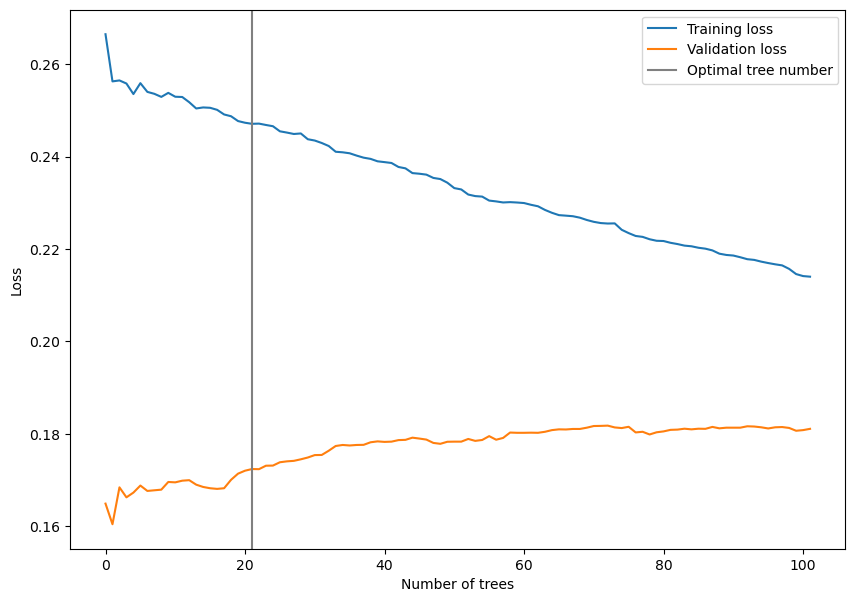

In [133]:
from catboost.utils import eval_metric
# import CatBoost

predictions = model.predict(X_test)

F1 = eval_metric(y_test, predictions, 'F1')
Precision = eval_metric(y_test, predictions, 'Precision')
Recall = eval_metric(y_test, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

from matplotlib import pyplot as plt
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["error"], label="Training loss")
plt.plot(results["validation_1"]["error"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

### Catboost

In [129]:
from catboost import CatBoostClassifier, Pool

params = {'loss_function':'Logloss',
          'eval_metric':'F1',
          'early_stopping_rounds': 2000,
          'iterations': 4000,
          'verbose': 500,
          'random_seed': random_seed,
          'l2_leaf_reg': 9,
          'bootstrap_type': 'Bayesian',
          # 'learning_rate': 0.1,
          'bagging_temperature': 1.5
         }

model = CatBoostClassifier(**params, class_weights=[0.3, 0.5])
# model = CatBoostClassifier(**params, scale_pos_weight=1)

model.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_val, y_val), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True, # True for visualization of the training process (it is not shown in a published kernel - try executing this code)

         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7235117	test: 0.8566168	best: 0.8566168 (0)	total: 44.7ms	remaining: 2m 58s
500:	learn: 0.7459556	test: 0.8299967	best: 0.8566168 (0)	total: 21s	remaining: 2m 26s
1000:	learn: 0.7590115	test: 0.8265681	best: 0.8566168 (0)	total: 42.1s	remaining: 2m 6s
1500:	learn: 0.7673300	test: 0.8239962	best: 0.8566168 (0)	total: 1m 3s	remaining: 1m 46s
2000:	learn: 0.7740812	test: 0.8218408	best: 0.8566168 (0)	total: 1m 25s	remaining: 1m 25s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 0.8566167877
bestIteration = 0

Shrink model to first 1 iterations.


In [130]:
predictions = model.predict(X_test)

F1 = eval_metric(y_test, predictions, 'F1')
Precision = eval_metric(y_test, predictions, 'Precision')
Recall = eval_metric(y_test, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)



F1: [0.6755565809205214]
Recall: [0.7619568045797555]
Precision: [0.6067550766680481]


### Save best model

In [34]:
import datetime

abspath_curr = 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM'

# Make directory
directory = os.path.dirname(abspath_curr + '/data/nairobi/result/')
if not os.path.exists(directory):
    os.makedirs(directory)


MPATH = f'{abspath_curr}/data/nairobi/result/'
T = datetime.datetime.now()
time = T.strftime("%y%m%d%H%M%S")
filename = 'XGboost_45'
out_file = f"{MPATH}/{filename}_{time}"

model.save_model(out_file)

## Inference 

In [24]:
# PATH= f'{abspath_curr}/data/nairobi/spfea.vrt'
# PATH = 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea/nai_area16.tif'
PATH = 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/temp/ImageTiles/tile_0-0.tif'
img = utils.read_image(PATH)
img_arr=img[0]
img_gt=img[1]
img_georef=img[2]

# Process spfea features, get the width, height and number of bands
n = img_arr.shape[0]
print (n) # number of bands
h = img_arr.shape[1]
print (h) # height
w = img_arr.shape[2]
print (w) # width

45
1000
1000


In [46]:
arr = img_arr[:, img_arr[0,...]!=-9999]
# mask = img_arr!=0
# img_arr[mask] =  np.transpose(arr)

In [47]:
arr =  np.transpose(arr)
mask = arr!=0
mask.shape
# mask[0]


(1000000, 45)

In [41]:
arr[mask].shape

(27203441,)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

arr = img_arr[:, img_arr[0,...]!=0]
arr =  np.transpose(arr)

si = SimpleImputer(missing_values=0, strategy='mean')
# impute the training data
mapx = si.fit_transform(arr)

# Standadized 
ss = StandardScaler()
MapX = ss.fit_transform(mapx)
# img_arr[img_arr == 0] = np.nan
# # img_arr.shape
# nan_mask = np.isnan(img_arr)


# # arr_no_nan = img_arr[~nan_mask[:,:]]

# # Set all masked pixels to zero
# masked = img_arr.copy()
# new_arr=masked[nan_mask] 
# # mapX = ss.fit_transform(arr)

In [49]:
# PREDICTION 

# PREDICTION
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

# load
# C:\Users\mowus\Documents\GWU\gwu_work\ML4DAM\data\nairobi\result\XGboost_45_221229000952
new_model = XGBClassifier()
new_model.load_model(f'{abspath_curr}/data/nairobi/result/XGboost_45_221229000952')
# pred_map = new_model.predict(data_x_scale)

# pred_map = new_model.predict(MapX)
pred_map = new_model.predict(arr[mask].reshape(h,w))

ValueError: cannot reshape array of size 27203441 into shape (1000,1000)

(0, 45)

In [28]:
arr[mask]=pred_map[mask]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

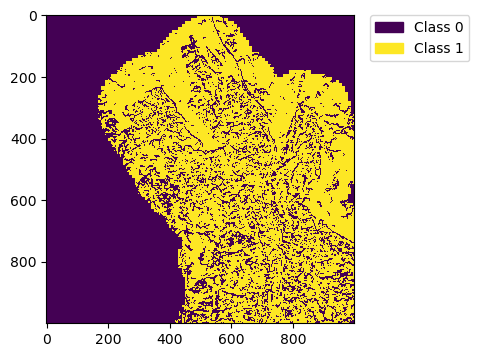

In [35]:
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

pred_map = pred_map.reshape(h, w)


values = np.unique(pred_map.ravel())

plt.figure(figsize=(8,4))
im = plt.imshow(pred_map, interpolation='none')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Class {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()

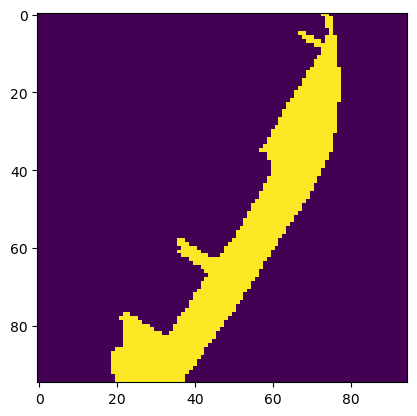

<AxesSubplot: >

In [131]:
# PATH= f'{abspath_curr}/data/nairobi/spfea.vrt'
PATH = 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask/nai_area16.tif'
img = utils.read_image(PATH)
img_arr=img[0]
show(img_arr)
# img_gt=img[1]
# img_georef=img[2]